In [102]:
from warnings import filterwarnings
filterwarnings('ignore')

In [103]:
import numpy as np
import pandas as pd

In [104]:
df= pd.read_csv('laptop_data.csv')

In [105]:
df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
216,216,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 940MX,No OS,2.8kg,31381.92
584,584,Dell,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26kg,15717.60
482,482,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.49kg,38681.28
126,126,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Intel UHD Graphics 620,Windows 10,1.63kg,43263.36
202,202,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23kg,39533.76
430,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15kg,14332.32
857,857,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,136343.52
694,694,Toshiba,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.5kg,51841.44
787,787,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,4GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.4kg,53226.72
94,94,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.25kg,55890.72


In [106]:
df.shape

(1303, 12)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [108]:
df.duplicated().sum()

0

In [109]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Performing necessary feature engeneering

In [192]:
df.drop(columns=['Unnamed: 0'],inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [111]:
df.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1054,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.2kg,120093.1200
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,77202.7200
325,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,15557.7600
445,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64kg,62817.1200
1047,MSI,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78kg,82351.6992
263,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.18kg,35004.9600


In [112]:
df['Ram']=df['Ram'].str.replace('GB', ' ')
df['Ram']

0        8 
1        8 
2        8 
3       16 
4        8 
       ... 
1298     4 
1299    16 
1300     2 
1301     6 
1302     4 
Name: Ram, Length: 1303, dtype: object

In [113]:
df['Weight'] = df['Weight'].str.replace('kg',' ')
df['Weight']

0       1.37 
1       1.34 
2       1.86 
3       1.83 
4       1.37 
        ...  
1298     1.8 
1299     1.3 
1300     1.5 
1301    2.19 
1302     2.2 
Name: Weight, Length: 1303, dtype: object

In [114]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
677,HP,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,8,64GB Flash Storage,Intel HD Graphics 500,Chrome OS,1.4,26373.6000
746,Samsung,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,Intel HD Graphics 620,Windows 10,0.81,87858.7200
515,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1,13053.6000
337,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,60952.3200
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.6800
212,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.1,18594.7200
1154,Dell,Notebook,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Nvidia GeForce 960M,Windows 10,2.04,119916.2304
136,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,No OS,1.9,13445.7408
1114,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,29250.7200
236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.1,20779.2000


In [115]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis 

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Density'>

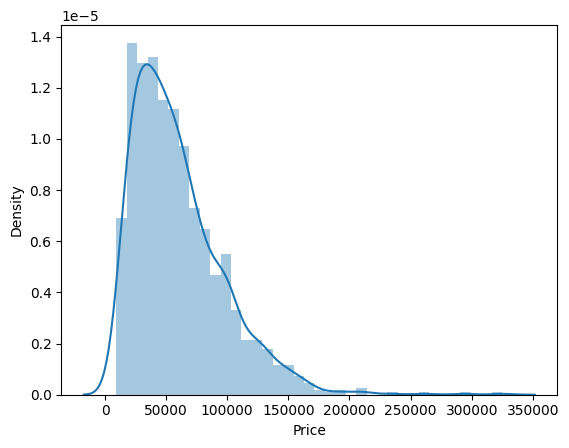

In [118]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

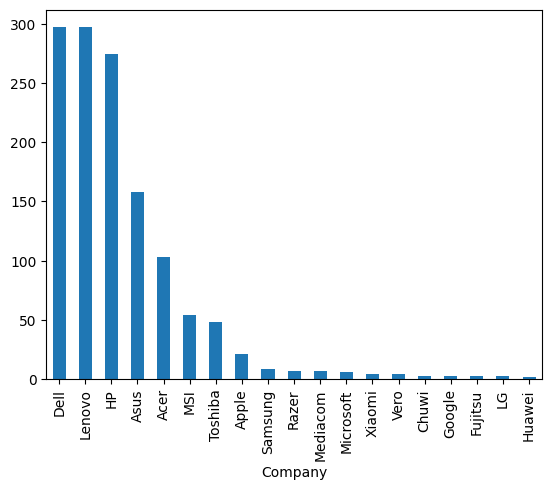

In [119]:
df['Company'].value_counts().plot(kind='bar')

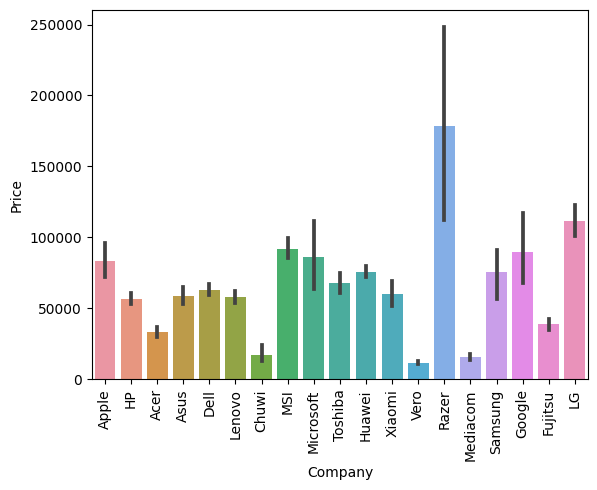

In [120]:
## Checking Average prices of Laptops
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

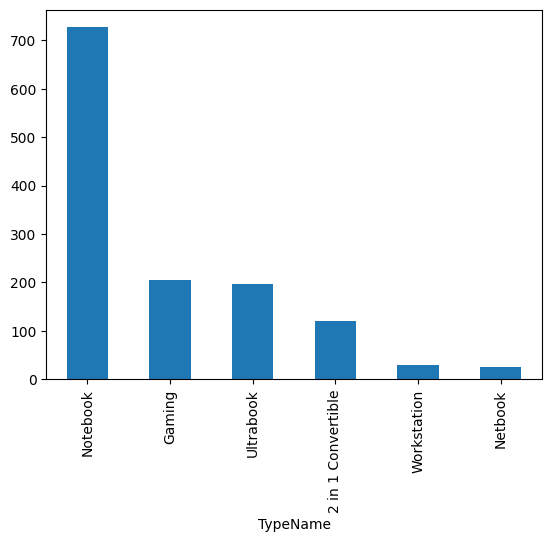

In [121]:
df['TypeName'].value_counts().plot(kind='bar')

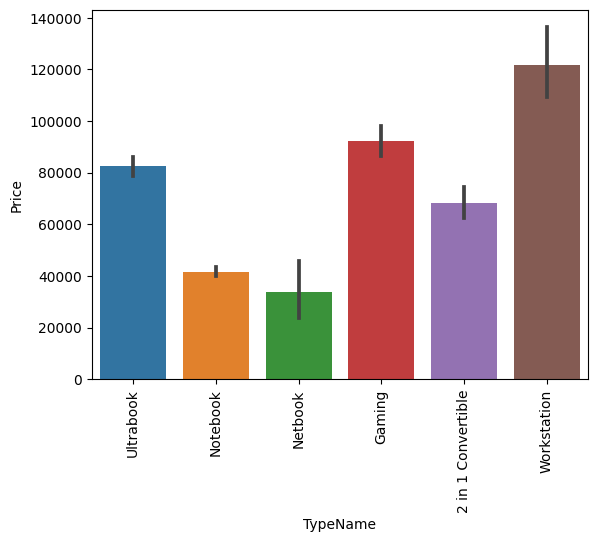

In [122]:
## Checking Average prices of Laptops
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

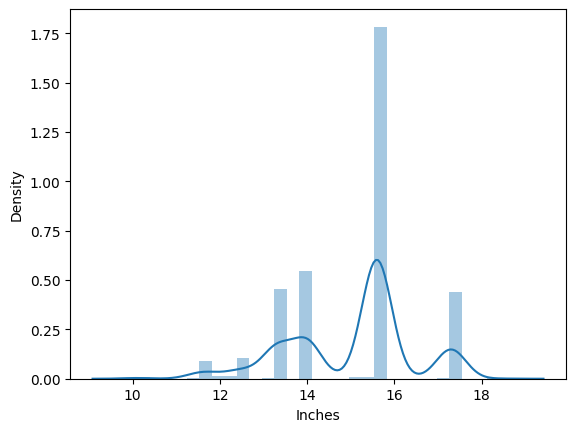

In [123]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

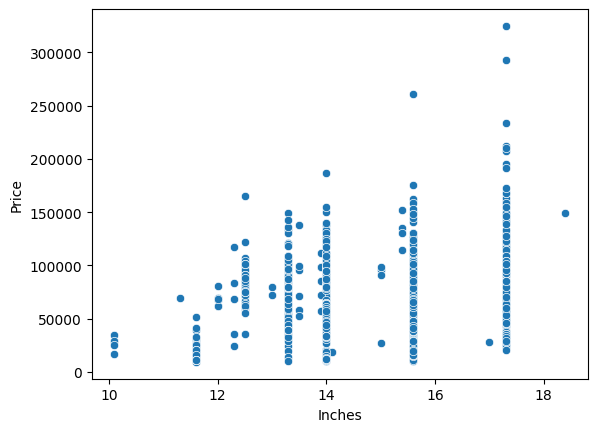

In [124]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [125]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [126]:
## Creating New Column
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [127]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1261,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.1200,0
1156,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,79536.3840,0
545,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,2.10,37589.0400,0
305,Lenovo,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,No OS,2.20,19180.2672,0
1284,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.10,18541.4400,0
335,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,67559.0400,0


<Axes: ylabel='count'>

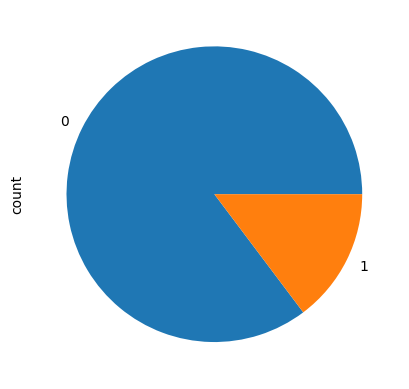

In [128]:
df['TouchScreen'].value_counts().plot(kind='pie')

<Axes: xlabel='TouchScreen', ylabel='Price'>

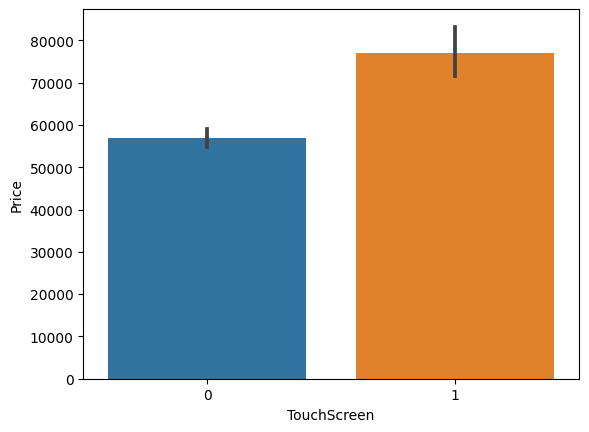

In [129]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [130]:
## Creating New Column
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [131]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
733,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.40,29783.52,0,0
560,Acer,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.25,18594.72,1,1
813,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce GT 940MX,Windows 10,1.98,51202.08,0,0
111,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.12,1,0
1071,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,63882.72,0,0
854,Asus,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.36,0,1
40,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.00,20725.92,0,0
511,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,500GB HDD,Nvidia GeForce 940MX,Windows 10,2.20,34045.92,0,0
425,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,61751.52,0,1
61,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.70,46833.12,0,0


<Axes: xlabel='Ips'>

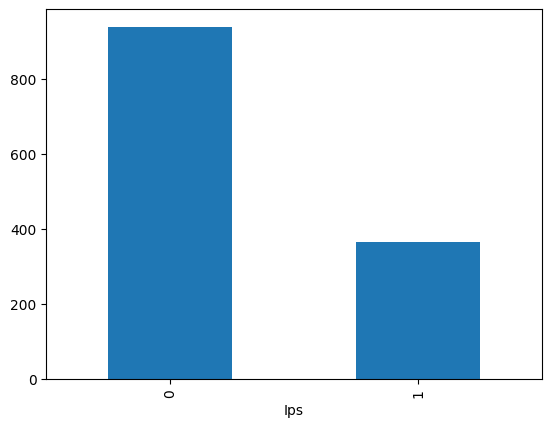

In [132]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

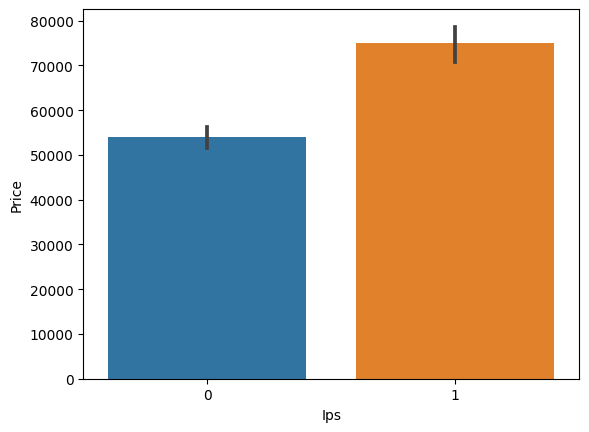

In [133]:
sns.barplot(x=df['Ips'], y=df['Price'])

In [134]:
## Creating new column
new =df['ScreenResolution'].str.split('x',n=1,expand=True)

In [135]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [136]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
777,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.80,33886.0800,0,1,IPS Panel Full HD 1920,1080
1001,HP,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,63349.9200,0,1,IPS Panel Full HD 1920,1080
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.7200,0,0,Full HD 1920,1080
1013,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.54,100550.5488,0,0,Full HD 1920,1080
542,HP,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,61005.6000,0,1,IPS Panel Quad HD+ 3200,1800
669,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Linux,2.10,21951.3600,0,0,1366,768
264,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R5 M430,Windows 10,2.24,30103.2000,0,0,Full HD 1920,1080
485,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.75,55890.7200,0,1,IPS Panel Full HD 1920,1080
775,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,2TB HDD,Nvidia GeForce 940MX,Windows 10,2.30,44701.9200,1,0,Full HD / Touchscreen 1920,1080
901,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32,256GB SSD + 256GB SSD,Nvidia GeForce GTX 980M,Windows 10,3.58,68145.1200,0,1,IPS Panel Full HD 1920,1080


In [137]:
## Regular expression

df['X_res']= df['X_res'].str.replace('','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [138]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
260,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,60845.7600,0,0,1920,1080
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,0,0,1920,1080
475,Dell,Notebook,14.0,1366x768,Intel Core i3 6100U 2.3GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,1.79,39427.2000,0,0,1366,768
640,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050M,Windows 10,2.50,59087.5200,0,1,1920,1080
358,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,Windows 10,2.36,29696.6736,1,0,1366,768
943,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,59620.3200,0,0,1366,768
719,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,63936.0000,0,0,1920,1080
567,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.20,39373.9200,0,0,1366,768
412,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,24988.3200,0,0,1920,1080
309,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.86,24988.3200,0,0,1920,1080


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [140]:
## Changing Datatype of X_res & Y_res

df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [142]:
## Cat Con Sepration

cat = df.columns[df.dtypes=='object']
cat

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
       'OpSys'],
      dtype='object')

In [143]:
con = df.columns[df.dtypes!='object']
con

Index(['Inches', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'X_res',
       'Y_res'],
      dtype='object')

In [144]:
## Creating  new column PPI (Pixecls per inches)

In [145]:
df['ppi']=(((df['X_res']** 2 + df['Y_res']**2))*0.5/df['Inches']).astype('float')


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [147]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi
1195,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.5600,0,1,1920,1080,155538.461538
654,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,19441.8720,0,0,1366,768,78710.897436
838,Lenovo,Notebook,14.0,1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.50,17316.0000,0,0,1366,768,87706.428571
1067,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,42517.9728,1,0,1920,1080,182436.090226
1225,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.5200,0,0,1366,768,78710.897436
366,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,57808.8000,0,0,1920,1080,140254.335260
469,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6600U 2.6GHz,12,256GB SSD,Intel HD Graphics 520,Windows 10,1.40,98994.2400,0,1,2560,1440,308114.285714
1291,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.9200,0,0,1366,768,78710.897436
150,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,66560.5728,0,0,1920,1080,155538.461538
558,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,6,128GB SSD,AMD Radeon 530,Windows 10,1.91,30310.9920,0,1,1920,1080,155538.461538


In [148]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  TouchScreen  1303 non-null   int64  
 11  Ips          1303 non-null   int64  
 12  X_res        1303 non-null   int32  
 13  Y_res        1303 non-null   int32  
 14  ppi          1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64(2), object(6)
memory usage: 132.5+ KB


In [150]:
df.drop(labels=['Inches','X_res','Y_res'],axis=1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,342616.541353
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,108406.015038
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,155538.461538
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,374493.506494
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,342616.541353
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,173314.285714
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,506766.917293
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,87706.428571
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,78710.897436


In [151]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [152]:
df['Cpu Name']= df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [153]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,342616.541353,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,108406.015038,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,155538.461538,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,374493.506494,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,342616.541353,Intel Core i5


In [154]:
def fetch_processor(text):
    if text =='Intel Core i7' or text =='Intel Core i5' or text =='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [155]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

<Axes: xlabel='Cpu Brand'>

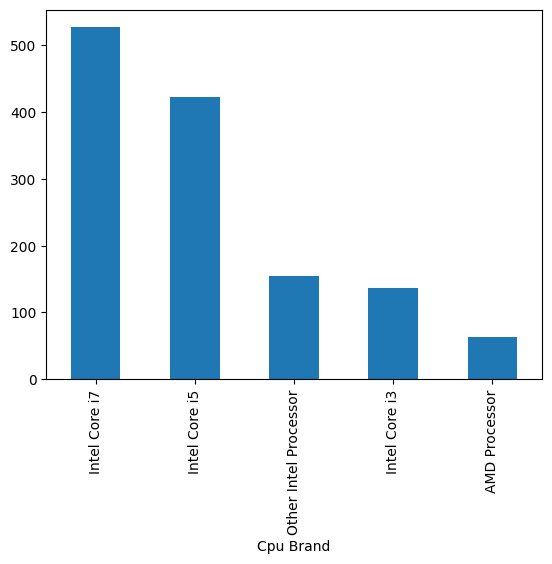

In [156]:
df['Cpu Brand'].value_counts().plot(kind ='bar')

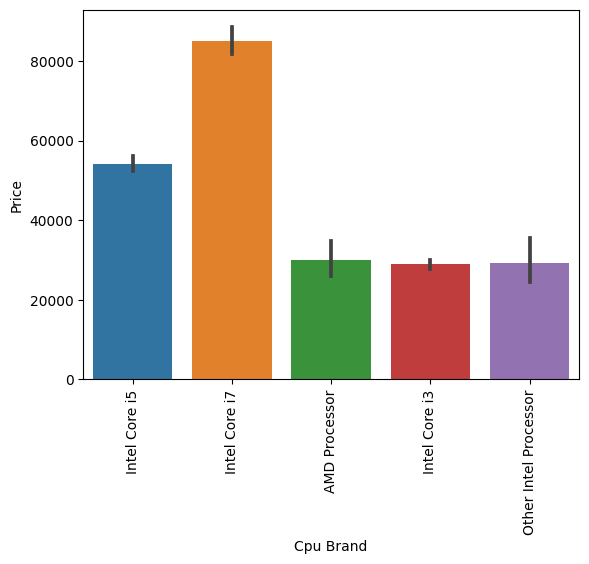

In [157]:
sns.barplot(x=df['Cpu Brand'] , y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [158]:
df.drop(labels=['Cpu','Cpu Name'],axis=1)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,342616.541353,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,108406.015038,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,155538.461538,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,374493.506494,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,342616.541353,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,173314.285714,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,506766.917293,Intel Core i7
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,87706.428571,Other Intel Processor
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,78710.897436,Intel Core i7


<Axes: xlabel='Ram'>

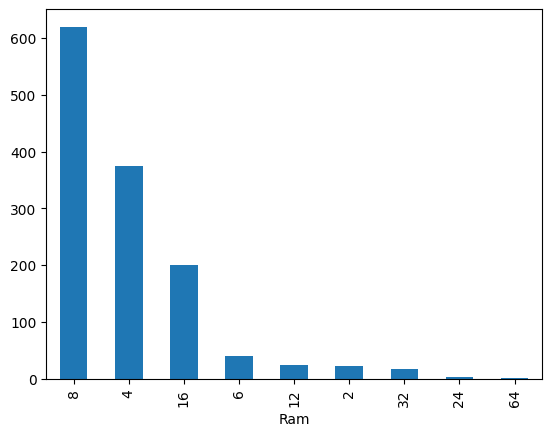

In [159]:
df['Ram'].value_counts().plot(kind='bar')

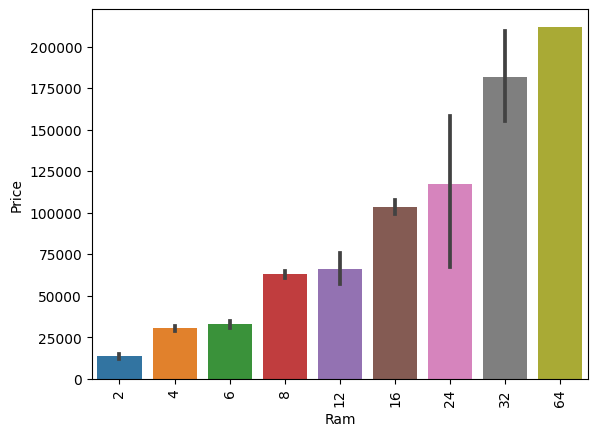

In [160]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [161]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [162]:
## Creating New Columns from Memory

In [163]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(object)
df["second"] = df["second"].astype(object)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [164]:
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
138,Lenovo,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,1000 HDD,Nvidia GeForce 920MX,No OS,2.20,26586.7200,...,0,1920,1080,155538.461538,Intel Core i5,Intel Core i5,1000 HDD,,,
1274,Asus,Notebook,15.6,Intel Celeron Dual Core N3050 1.6GHz,4,500 HDD,Intel HD Graphics,Windows 10,2.20,19660.3200,...,0,1366,768,78710.897436,Intel Celeron Dual,Other Intel Processor,500 HDD,,,
1013,HP,Ultrabook,14.0,Intel Core i7 6500U 2.5GHz,8,256 SSD,Intel HD Graphics 520,Windows 10,1.54,100550.5488,...,0,1920,1080,173314.285714,Intel Core i7,Intel Core i7,,256 SSD,,
508,HP,Ultrabook,13.3,Intel Core i7 7500U 2.7GHz,8,512 SSD,Intel HD Graphics 620,Windows 10,1.34,70489.4400,...,1,1920,1080,182436.090226,Intel Core i7,Intel Core i7,,512 SSD,,
625,Lenovo,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1000 HDD,Nvidia GeForce 920MX,Windows 10,2.20,47898.7200,...,0,1920,1080,155538.461538,Intel Core i7,Intel Core i7,1000 HDD,,,
852,Dell,Notebook,17.3,Intel Core i7 7500U 2.7GHz,8,1000 HDD,AMD Radeon R7 M445,Linux,2.83,46087.2000,...,0,1920,1080,140254.335260,Intel Core i7,Intel Core i7,1000 HDD,,,
724,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,71847.0144,...,0,1920,1080,140254.335260,Intel Core i7,Intel Core i7,1000 HDD,128 SSD,,
194,Dell,2 in 1 Convertible,13.3,Intel Core i7 8550U 1.8GHz,8,1000 HDD,Intel UHD Graphics 620,Windows 10,1.62,44701.9200,...,1,1920,1080,182436.090226,Intel Core i7,Intel Core i7,1000 HDD,,,
1119,Asus,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,...,0,1920,1080,140254.335260,Intel Core i7,Intel Core i7,1000 HDD,128 SSD,,
636,Dell,Ultrabook,13.3,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.23,99580.3200,...,0,3200,1800,506766.917293,Intel Core i5,Intel Core i5,,256 SSD,,


In [165]:
df.drop(labels=['Memory'],axis=1)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,128 SSD,,
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,108406.015038,Intel Core i5,Intel Core i5,,,,128 Flash Storage
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,155538.461538,Intel Core i5,Intel Core i5,,256 SSD,,
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,374493.506494,Intel Core i7,Intel Core i7,,512 SSD,,
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,256 SSD,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,173314.285714,Intel Core i7,Intel Core i7,,128 SSD,,
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,506766.917293,Intel Core i7,Intel Core i7,,512 SSD,,
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,87706.428571,Intel Celeron Dual,Other Intel Processor,,,,64 Flash Storage
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,78710.897436,Intel Core i7,Intel Core i7,1000 HDD,,,


In [166]:
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
259,Lenovo,2 in 1 Convertible,15.6,Intel Core i7 7700HQ 2.8GHz,8,512 SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522.7200,...,1,1920,1080,155538.461538,Intel Core i7,Intel Core i7,,512 SSD,,
311,Dell,Ultrabook,13.3,Intel Core i7 8550U 1.8GHz,16,1000 SSD,Intel UHD Graphics 620,Windows 10,1.21,133146.7200,...,1,3840,2160,729744.360902,Intel Core i7,Intel Core i7,,1000 SSD,,
522,Dell,Notebook,14.0,Intel Core i5 7300U 2.6GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.64,68184.0144,...,0,1920,1080,173314.285714,Intel Core i5,Intel Core i5,,256 SSD,,
191,Vero,Notebook,14.0,Intel Celeron Dual Core N3350 1.1GHz,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.30,13852.8000,...,1,1920,1080,173314.285714,Intel Celeron Dual,Other Intel Processor,,,,32 Flash Storage
61,Dell,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.70,46833.1200,...,0,1920,1080,173314.285714,Intel Core i5,Intel Core i5,,256 SSD,,
921,HP,Ultrabook,15.6,Intel Core i7 6500U 2.5GHz,8,256 SSD,AMD Radeon R7 M365X,Windows 10,1.84,69103.6272,...,0,1920,1080,155538.461538,Intel Core i7,Intel Core i7,,256 SSD,,
1162,HP,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.7200,...,1,1920,1080,155538.461538,Intel Core i7,Intel Core i7,1000 HDD,,,
785,MSI,Gaming,14.0,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,1.60,100752.4800,...,1,1920,1080,173314.285714,Intel Core i7,Intel Core i7,1000 HDD,256 SSD,,
382,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,88178.4000,...,1,1920,1080,155538.461538,Intel Core i7,Intel Core i7,1000 HDD,128 SSD,,
877,Xiaomi,Ultrabook,13.3,Intel Core i5 6200U 2.3GHz,8,256 SSD,Nvidia GeForce 940MX,Windows 10,1.28,49816.8000,...,1,1920,1080,182436.090226,Intel Core i5,Intel Core i5,,256 SSD,,


In [167]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [168]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD
655,Toshiba,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,500 HDD,Intel HD Graphics 620,Windows 10,2.00,56689.9200,0,1,1920,1080,155538.461538,Intel Core i5,Intel Core i5,500 HDD,
41,Dell,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,79866.7200,0,1,1920,1080,155538.461538,Intel Core i7,Intel Core i7,1000 HDD,256 SSD
1002,Dell,Notebook,15.6,Intel Core i3 7100U 2.4GHz,4,128 SSD,Intel HD Graphics 620,Windows 10,2.18,29144.1600,0,0,1366,768,78710.897436,Intel Core i3,Intel Core i3,,128 SSD
1158,Lenovo,Notebook,15.6,Intel Core i5 6200U 2.3GHz,8,1000 Hybrid,AMD Radeon R5 M330,Windows 10,2.50,42010.7472,0,0,1920,1080,155538.461538,Intel Core i5,Intel Core i5,,
472,Google,Ultrabook,12.3,Intel Core i5 7Y57 1.2GHz,8,128 SSD,Intel HD Graphics 615,Chrome OS,1.10,67932.0000,1,0,2400,1600,338211.382114,Intel Core i5,Intel Core i5,,128 SSD


In [169]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [170]:
 df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [171]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand
461,Acer,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,128 SSD,Intel HD Graphics 400,Windows 10,1.40,23176.8000,0,0,1366,768,105852.586207,Intel Celeron Dual,Other Intel Processor,,128 SSD,Intel
66,HP,Notebook,15.6,Intel Core i3 6006U 2GHz,4,500 HDD,AMD Radeon 520,Windows 10,1.86,23373.4032,0,0,1366,768,78710.897436,Intel Core i3,Intel Core i3,500 HDD,,AMD
380,HP,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,63456.4800,0,1,1920,1080,140254.335260,Intel Core i7,Intel Core i7,1000 HDD,128 SSD,Nvidia
1102,Acer,Notebook,15.6,Intel Celeron Dual Core 3205U 1.5GHz,4,16 SSD,Intel HD Graphics,Chrome OS,2.20,11135.5200,0,0,1366,768,78710.897436,Intel Celeron Dual,Other Intel Processor,,16 SSD,Intel
34,Apple,Ultrabook,13.3,Intel Core i5 1.6GHz,8,256 Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,53173.4400,0,0,1440,900,108406.015038,Intel Core i5,Intel Core i5,,,Intel


In [172]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [173]:
df=df[df['Gpu Brand']!='ARM']

In [174]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

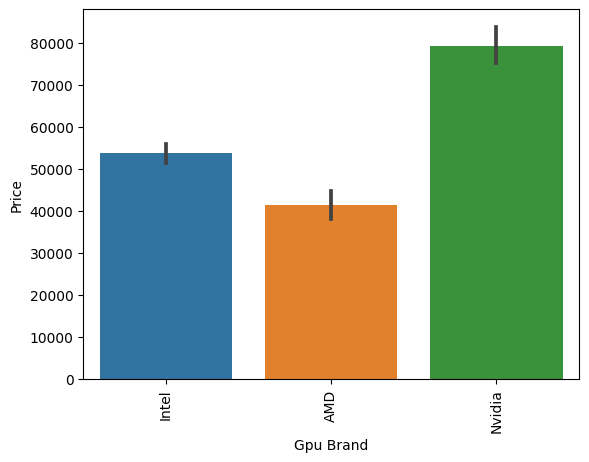

In [175]:
sns.barplot(x=df['Gpu Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [176]:
df.drop(columns=['Gpu'],inplace=True)

In [177]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,macOS,1.37,71378.6832,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,128 SSD,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,1440,900,108406.015038,Intel Core i5,Intel Core i5,,,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,No OS,1.86,30636.0000,0,0,1920,1080,155538.461538,Intel Core i5,Intel Core i5,,256 SSD,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,macOS,1.83,135195.3360,0,1,2880,1800,374493.506494,Intel Core i7,Intel Core i7,,512 SSD,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,macOS,1.37,96095.8080,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,256 SSD,Intel


In [178]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

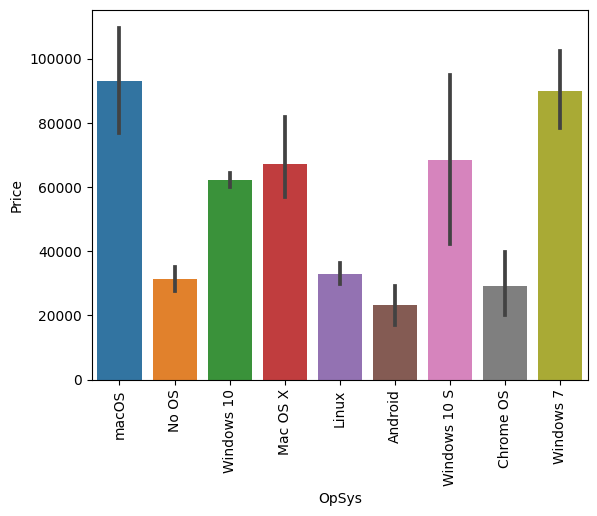

In [179]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [180]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == ' macOS' or inp =='Mac OS X':
        return ' Mac'
    else:
        return 'Others/NO OS/Linux'


In [181]:
df['os']=df['OpSys'].apply(cat_os)

In [182]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,macOS,1.37,71378.6832,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,128 SSD,Intel,Others/NO OS/Linux
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,1440,900,108406.015038,Intel Core i5,Intel Core i5,,,Intel,Others/NO OS/Linux
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,No OS,1.86,30636.0000,0,0,1920,1080,155538.461538,Intel Core i5,Intel Core i5,,256 SSD,Intel,Others/NO OS/Linux
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,macOS,1.83,135195.3360,0,1,2880,1800,374493.506494,Intel Core i7,Intel Core i7,,512 SSD,AMD,Others/NO OS/Linux
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,macOS,1.37,96095.8080,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,256 SSD,Intel,Others/NO OS/Linux


In [183]:
df.drop(columns=['OpSys'],inplace=True)

In [184]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Weight,Price,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,1.37,71378.6832,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,128 SSD,Intel,Others/NO OS/Linux
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,1.34,47895.5232,0,0,1440,900,108406.015038,Intel Core i5,Intel Core i5,,,Intel,Others/NO OS/Linux
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,1.86,30636.0000,0,0,1920,1080,155538.461538,Intel Core i5,Intel Core i5,,256 SSD,Intel,Others/NO OS/Linux
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,1.83,135195.3360,0,1,2880,1800,374493.506494,Intel Core i7,Intel Core i7,,512 SSD,AMD,Others/NO OS/Linux
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,1.37,96095.8080,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,256 SSD,Intel,Others/NO OS/Linux


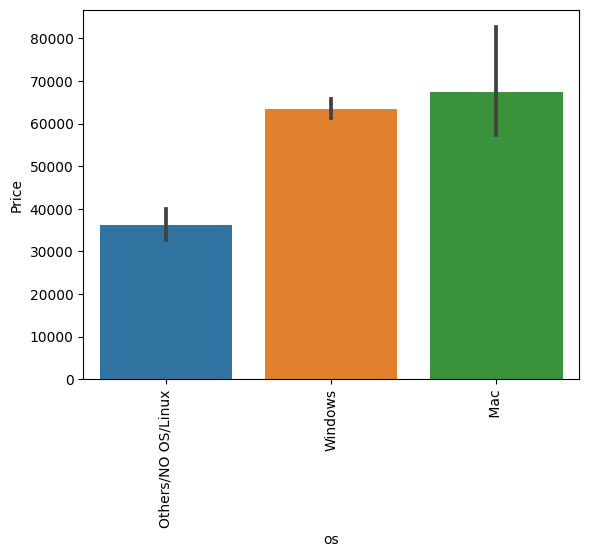

In [185]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

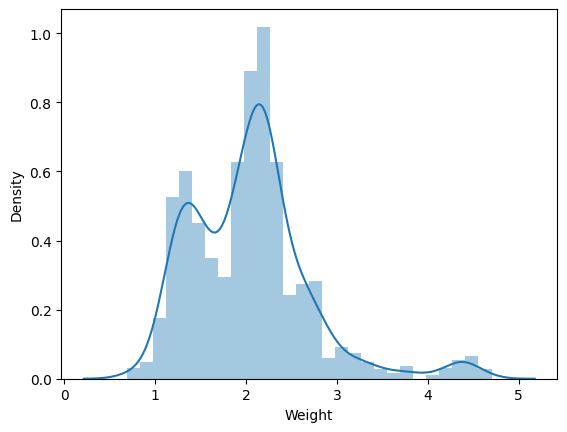

In [186]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

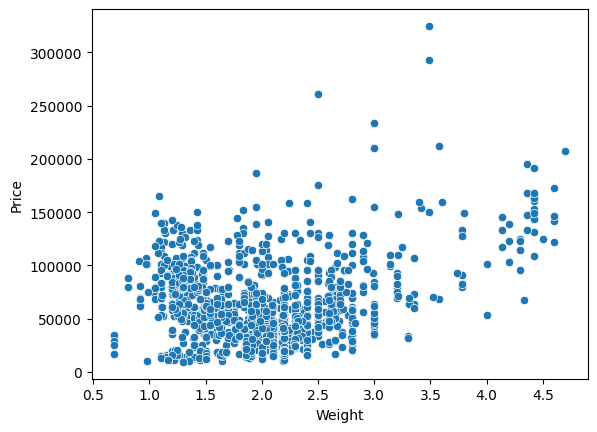

In [187]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

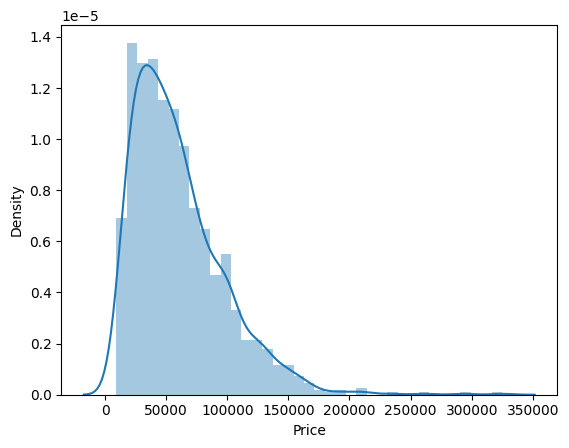

In [188]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

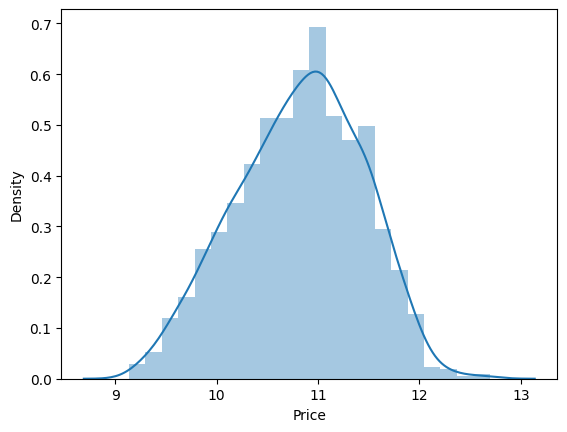

In [189]:
sns.distplot(np.log(df['Price']))

In [190]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [191]:
X.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Weight,TouchScreen,Ips,X_res,Y_res,ppi,Cpu Name,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,1.37,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,128 SSD,Intel,Others/NO OS/Linux
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,1.34,0,0,1440,900,108406.015038,Intel Core i5,Intel Core i5,,,Intel,Others/NO OS/Linux
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,1.86,0,0,1920,1080,155538.461538,Intel Core i5,Intel Core i5,,256 SSD,Intel,Others/NO OS/Linux
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,1.83,0,1,2880,1800,374493.506494,Intel Core i7,Intel Core i7,,512 SSD,AMD,Others/NO OS/Linux
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,1.37,0,1,2560,1600,342616.541353,Intel Core i5,Intel Core i5,,256 SSD,Intel,Others/NO OS/Linux
